In [176]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### FOR OPEN THE TEXT FILE:

In [177]:

with open("imdb_labelled.txt","r") as text_file:
    lines = text_file.read().split('\n')

In [178]:
lines[1:10]#extract the elements of a list

['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0',
 'Very little music or anything to speak of.  \t0',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1',
 "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0",
 'Wasted two hours.  \t0',
 'Saw the movie today and thought it was a good effort, good messages for kids.  \t1',
 'A bit predictable.  \t0',
 'Loved the casting of Jimmy Buffet as the science teacher.  \t1']

In [179]:
# split by tab and remove corrupted data if any or lines which are not tab seperated
lines = [line.split("\t") for line in lines if len(line.split("\t"))==2 and line.split("\t")[1]!='']
lines[1:10]

[['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  '0'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  '0'],
 ['Very little music or anything to speak of.  ', '0'],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
  '1'],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
  '0'],
 ['Wasted two hours.  ', '0'],
 ['Saw the movie today and thought it was a good effort, good messages for kids.  ',
  '1'],
 ['A bit predictable.  ', '0'],
 ['Loved the casting of Jimmy Buffet as the science teacher.  ', '1']]

In [180]:
# Seperate the sentences
train_doc = [line[0] for line in lines ]
train_doc

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
 'Very little music or anything to speak of.  ',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
 "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
 'Wasted two hours.  ',
 'Saw the movie today and thought it was a good effort, good messages for kids.  ',
 'A bit predictable.  ',
 'Loved the casting of Jimmy Buffet as the science teacher.  ',
 'And those baby owls were adorable.  ',
 "The movie showed a lot of Florida at it's best, made it look very appealing.  ",
 'The Son

In [181]:
# Seperate the labels
train_labels = [int(line[1]) for line in lines]
train_labels[1:10]

[0, 0, 0, 1, 0, 0, 1, 0, 1]

In [182]:
from sklearn.feature_extraction.text import CountVectorizer

In [183]:
# Instatiate the Countvectorizer
count_vectorizer = CountVectorizer(binary='true')
# Train the documents
train_documents = count_vectorizer.fit_transform(train_doc)

In [184]:
train_documents

<1000x3051 sparse matrix of type '<class 'numpy.int64'>'
	with 12667 stored elements in Compressed Sparse Row format>

In [185]:
print(train_documents[0])

  (0, 1641)	1
  (0, 3041)	1
  (0, 787)	1
  (0, 749)	1
  (0, 37)	1
  (0, 1750)	1
  (0, 92)	1
  (0, 1752)	1
  (0, 2408)	1
  (0, 2875)	1


In [186]:
count_vectorizer.vocabulary_

{'very': 2875,
 'slow': 2408,
 'moving': 1752,
 'aimless': 92,
 'movie': 1750,
 'about': 37,
 'distressed': 749,
 'drifting': 787,
 'young': 3041,
 'man': 1641,
 'not': 1815,
 'sure': 2571,
 'who': 2969,
 'was': 2921,
 'more': 1735,
 'lost': 1607,
 'the': 2642,
 'flat': 1036,
 'characters': 432,
 'or': 1864,
 'audience': 196,
 'nearly': 1779,
 'half': 1207,
 'of': 1839,
 'whom': 2973,
 'walked': 2909,
 'out': 1877,
 'attempting': 192,
 'artiness': 169,
 'with': 2989,
 'black': 290,
 'white': 2967,
 'and': 125,
 'clever': 479,
 'camera': 377,
 'angles': 131,
 'disappointed': 731,
 'became': 249,
 'even': 893,
 'ridiculous': 2202,
 'as': 174,
 'acting': 56,
 'poor': 2004,
 'plot': 1988,
 'lines': 1577,
 'almost': 104,
 'non': 1807,
 'existent': 922,
 'little': 1583,
 'music': 1762,
 'anything': 148,
 'to': 2698,
 'speak': 2454,
 'best': 276,
 'scene': 2270,
 'in': 1359,
 'when': 2959,
 'gerardo': 1135,
 'is': 1424,
 'trying': 2763,
 'find': 1019,
 'song': 2435,
 'that': 2641,
 'keeps': 1

In [187]:
x = train_documents
y = train_labels

In [188]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(x,y,test_size = 0.30,random_state = 7)

# IMPLEMENTING CLASSIFIER MODELS AND ALSO COMPARING DIFFERENT CLASSIFIERS:

# NAIVE BAYES:

## (1) Multinolmial Naive Bayes:

In [189]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB().fit(X_train,Y_train)
multi_pred = multi.predict(X_test)

In [190]:
multi_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [191]:
from sklearn import metrics
multi_acc = metrics.accuracy_score(Y_test,multi_pred)
multi_acc

0.7866666666666666

In [192]:
multi_f1 = metrics.f1_score(Y_test, multi_pred, average='weighted', labels=np.unique(multi_pred))
multi_f1

0.7857229247657774

In [193]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,multi_pred)
print(matrix)

[[129  23]
 [ 41 107]]


In [194]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test,multi_pred))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80       152
          1       0.82      0.72      0.77       148

avg / total       0.79      0.79      0.79       300



### (2) Bernoulli Naive Bayes:

In [195]:
# Training Phase
from sklearn.naive_bayes import BernoulliNB
bern = BernoulliNB().fit(X_train,Y_train)
bern_pred = bern.predict(X_test)



In [196]:
from sklearn import metrics
bern_acc = metrics.accuracy_score(Y_test,bern_pred)
bern_acc

0.7666666666666667

In [197]:
bern_f1 = metrics.f1_score(Y_test, bern_pred, average='weighted', labels=np.unique(bern_pred))
bern_f1




0.7620033914728682

In [198]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test,bern_pred))

             precision    recall  f1-score   support

          0       0.71      0.90      0.80       152
          1       0.86      0.63      0.73       148

avg / total       0.79      0.77      0.76       300



In [199]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,bern_pred)
print(matrix)

[[137  15]
 [ 55  93]]


### (3)Gaussain Naive Bayes:

In [200]:
from sklearn.naive_bayes import GaussianNB


In [201]:

gauss = GaussianNB()
gauss.fit(X_train.todense(),Y_train)

GaussianNB(priors=None)

In [202]:
gauss_pred =  gauss.predict(X_test.todense())


In [203]:

gauss_acc = metrics.accuracy_score(gauss_pred,Y_test)
gauss_acc

0.6666666666666666

In [204]:
print(classification_report(gauss_pred,Y_test))

             precision    recall  f1-score   support

          0       0.79      0.64      0.71       188
          1       0.54      0.71      0.62       112

avg / total       0.70      0.67      0.67       300



In [205]:
matrix = confusion_matrix(Y_test,gauss_pred)
print(matrix)

[[120  32]
 [ 68  80]]


In [206]:
gauss_f1 = metrics.f1_score(Y_test, gauss_pred, average='weighted', labels=np.unique(gauss_pred))
gauss_f1

0.6612368024132729

In [207]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# KNeighborsClassifier:

In [208]:
KNN_pred = KNN.predict(X_test)


In [209]:

KNN_acc = metrics.accuracy_score(Y_test,KNN_pred)
KNN_acc

0.6

In [210]:
KNN_mat = confusion_matrix(Y_test, KNN_pred)
KNN_mat

array([[107,  45],
       [ 75,  73]], dtype=int64)

In [211]:
print(classification_report(Y_test, KNN_pred))

             precision    recall  f1-score   support

          0       0.59      0.70      0.64       152
          1       0.62      0.49      0.55       148

avg / total       0.60      0.60      0.60       300



In [212]:
KNN_f1 = metrics.f1_score(Y_test, KNN_pred, average='weighted', labels=np.unique(KNN_pred))
KNN_f1

0.5954076808788438

# Support vector machine:

In [213]:
from sklearn.svm import SVC

### (1)Linear SVC:

In [214]:
lsvc =SVC(kernel = "linear",degree=8)

In [215]:
lsvc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [216]:
lsvc_pred = lsvc.predict(X_test)


In [217]:

lsvc_acc = metrics.accuracy_score(Y_test,lsvc_pred)
lsvc_acc

0.7433333333333333

In [218]:
matrix = confusion_matrix(Y_test,lsvc_pred)
print(matrix)

[[113  39]
 [ 38 110]]


In [219]:
print(classification_report(Y_test,lsvc_pred))

             precision    recall  f1-score   support

          0       0.75      0.74      0.75       152
          1       0.74      0.74      0.74       148

avg / total       0.74      0.74      0.74       300



In [220]:
lsvc_f1 = metrics.f1_score(Y_test, lsvc_pred, average='weighted', labels=np.unique(lsvc_pred))
lsvc_f1


0.74334188974453

### (2)Poly SVC:

In [221]:
psvc =SVC(kernel = "poly",degree= 8)


In [222]:

psvc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [223]:
psvc_pred = psvc.predict(X_test)


In [224]:

psvc_acc = metrics.accuracy_score(Y_test,psvc_pred)
psvc_acc

0.49333333333333335

In [225]:
matrix = confusion_matrix(Y_test,psvc_pred)
print(matrix)

[[  0 152]
 [  0 148]]


In [226]:
print(classification_report(Y_test,psvc_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       152
          1       0.49      1.00      0.66       148

avg / total       0.24      0.49      0.33       300



C:\Users\pc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [227]:
psvc_f1 = metrics.f1_score(Y_test, psvc_pred, average='weighted', labels=np.unique(psvc_pred))
psvc_f1

0.6607142857142857

### (3)Gaussian SVC:

In [228]:
gsvc = SVC(kernel = 'rbf')
gsvc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [229]:
gsvc_pred = gsvc.predict(X_test)


In [230]:

gsvc_acc = metrics.accuracy_score(gsvc_pred, Y_test)
gsvc_acc

0.49333333333333335

In [231]:
gsvc_mat = confusion_matrix(Y_test, gsvc_pred)
gsvc_mat

array([[  0, 152],
       [  0, 148]], dtype=int64)

In [232]:
print(classification_report(Y_test, gsvc_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       152
          1       0.49      1.00      0.66       148

avg / total       0.24      0.49      0.33       300



C:\Users\pc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [233]:
gsvc_f1 =  metrics.f1_score(Y_test, gsvc_pred, average='weighted', labels=np.unique(gsvc_pred))
gsvc_f1

0.6607142857142857

# Decision Tree Classifier:

In [234]:
from sklearn.tree import DecisionTreeClassifier


In [235]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [236]:
dtree_pred = dtree.predict(X_test)


In [237]:

dtree_acc = metrics.accuracy_score(Y_test, dtree_pred)
dtree_acc

0.64

In [238]:
dtree_mat = confusion_matrix(Y_test, dtree_pred)
dtree_mat

array([[94, 58],
       [50, 98]], dtype=int64)

In [239]:
print(classification_report(Y_test, dtree_pred))

             precision    recall  f1-score   support

          0       0.65      0.62      0.64       152
          1       0.63      0.66      0.64       148

avg / total       0.64      0.64      0.64       300



In [240]:
dtree_f1 = metrics.f1_score(Y_test, dtree_pred)
dtree_f1

0.644736842105263

# Random Forest Classifier:

In [241]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=7)


In [242]:
ran.fit(X_train , Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [243]:
ran_pred = ran.predict(X_test)


In [244]:

ran_acc = metrics.accuracy_score(Y_test, ran_pred)
ran_acc

0.7166666666666667

In [245]:
ran_mat = confusion_matrix(Y_test, ran_pred)
ran_mat

array([[113,  39],
       [ 46, 102]], dtype=int64)

In [246]:
print(classification_report(Y_test, ran_pred))

             precision    recall  f1-score   support

          0       0.71      0.74      0.73       152
          1       0.72      0.69      0.71       148

avg / total       0.72      0.72      0.72       300



In [247]:
ran_f1 = metrics.f1_score(Y_test, ran_pred)
ran_f1

0.7058823529411765

# Voting Classifier:

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [249]:
estimators =[]
model = LogisticRegression()
estimators.append(('logistic',model))
model1 = SVC(kernel = 'rbf')
estimators.append(('SVC',model1))
model2 = KMeans()
estimators.append(('KMeans',model2))
model3 = KNeighborsClassifier()
estimators.append(('KNN',model3))
voting = VotingClassifier(estimators)

In [250]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('SVC', ...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [251]:
voting_pred = voting.predict(X_test)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [252]:
voting_acc = metrics.accuracy_score(Y_test,voting_pred)
voting_acc

0.7

In [253]:
voting_mat = confusion_matrix(Y_test, voting_pred)
voting_mat


array([[ 91,  61],
       [ 29, 119]], dtype=int64)

In [254]:
print(classification_report(Y_test, voting_pred))

             precision    recall  f1-score   support

          0       0.76      0.60      0.67       152
          1       0.66      0.80      0.73       148

avg / total       0.71      0.70      0.70       300



In [255]:
voting_f1 = metrics.f1_score(Y_test, voting_pred)
voting_f1

0.7256097560975611

# BaggingClassifier:

In [256]:
from sklearn.ensemble import BaggingClassifier


In [257]:
bagg=BaggingClassifier(n_estimators=30,random_state=7,verbose=1)
bagg

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=7,
         verbose=1, warm_start=False)

In [258]:
bagg.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=7,
         verbose=1, warm_start=False)

In [259]:
bagg_pred=bagg.predict(X_test)
bagg_pred

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [260]:
bagg_acc = metrics.accuracy_score(Y_test,bagg_pred)
bagg_acc

0.6933333333333334

In [261]:
bagg_mat = confusion_matrix(Y_test, bagg_pred)
bagg_mat

array([[109,  43],
       [ 49,  99]], dtype=int64)

In [262]:
print(classification_report(Y_test, bagg_pred))

             precision    recall  f1-score   support

          0       0.69      0.72      0.70       152
          1       0.70      0.67      0.68       148

avg / total       0.69      0.69      0.69       300



In [263]:
bagg_f1 = metrics.f1_score(Y_test, bagg_pred)
bagg_f1

0.6827586206896551

# GradientBoostingClassifier:

In [264]:
from sklearn.ensemble import GradientBoostingClassifier

In [265]:
grad=GradientBoostingClassifier(n_estimators=30,random_state=7,verbose=1)
grad

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=7, subsample=1.0, verbose=1,
              warm_start=False)

In [266]:

grad.fit(X_train,Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3631            9.28s
         2           1.3453            4.94s
         3           1.3302            3.38s
         4           1.3145            2.54s
         5           1.3024            2.11s
         6           1.2904            1.75s
         7           1.2795            1.54s
         8           1.2704            1.33s
         9           1.2596            1.20s
        10           1.2524            1.06s
        20           1.1813            0.40s
        30           1.1260            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=7, subsample=1.0, verbose=1,
              warm_start=False)

In [267]:
grad_pred = grad.predict(X_test)

In [268]:
grad_acc = metrics.accuracy_score(Y_test,grad_pred)
grad_acc

0.66

In [269]:
grad_mat = confusion_matrix(Y_test, grad_pred)
grad_mat

array([[110,  42],
       [ 60,  88]], dtype=int64)

In [270]:
print(classification_report(Y_test, grad_pred))

             precision    recall  f1-score   support

          0       0.65      0.72      0.68       152
          1       0.68      0.59      0.63       148

avg / total       0.66      0.66      0.66       300



In [271]:
grad_f1 = metrics.f1_score(Y_test, grad_pred)
grad_f1


0.6330935251798562

In [272]:
Algo_name = ["Multinolmial Naive Bayes","Bernoulli Naive Bayes","Gaussain Naive Bayes","KNN","Linear SVC","Poly SVC",
             "Gaussian SVC","Decision Tree Classifier","Random Forest Classifier","Voting Classifier","BaggingClassifier","GradientBoostingClassifier"]
f1_score = [multi_f1,bern_f1,gauss_f1,KNN_f1,lsvc_f1,psvc_f1,gsvc_f1,dtree_f1,ran_f1,voting_f1,bagg_f1,grad_f1]

In [273]:
res = pd.DataFrame({"Algorithms":Algo_name, "F1_score":f1_score }, index = [1,2,3,4,5,6,7,8,9,10,11,12])
res

,Algorithms,F1_score
1,Multinolmial Naive Bayes,0.785723
2,Bernoulli Naive Bayes,0.762003
3,Gaussain Naive Bayes,0.661237
4,KNN,0.595408
5,Linear SVC,0.743342
6,Poly SVC,0.660714
7,Gaussian SVC,0.660714
8,Decision Tree Classifier,0.644737
9,Random Forest Classifier,0.705882
10,Voting Classifier,0.725610


In [274]:
Algo_name = ["Multinolmial Naive Bayes","Bernoulli Naive Bayes","Gaussain Naive Bayes","KNN","Linear SVC","Poly SVC",
             "Gaussian SVC","Decision Tree Classifier","Random Forest Classifier","Voting Classifier","BaggingClassifier","GradientBoostingClassifier"]
accuracy = [multi_acc,bern_acc,gauss_acc,KNN_acc,lsvc_acc,psvc_acc,gsvc_acc,dtree_acc,ran_acc,voting_acc,bagg_acc,grad_acc]

In [275]:
res2 = pd.DataFrame({"Algorithms":Algo_name, "Accuracy":accuracy}, index = [1,2,3,4,5,6,7,8,9,10,11,12])
res2

,Algorithms,Accuracy
1,Multinolmial Naive Bayes,0.786667
2,Bernoulli Naive Bayes,0.766667
3,Gaussain Naive Bayes,0.666667
4,KNN,0.600000
5,Linear SVC,0.743333
6,Poly SVC,0.493333
7,Gaussian SVC,0.493333
8,Decision Tree Classifier,0.640000
9,Random Forest Classifier,0.716667
10,Voting Classifier,0.700000


# VISUALIZATION OF CLASSIFIERS:

In [276]:
a=["Multinolmial NB","Bernoulli NB","Gaussain NB","KNN","Linear SVC","Poly SVC"]

In [277]:

b=[80,70,60,50,75,62]

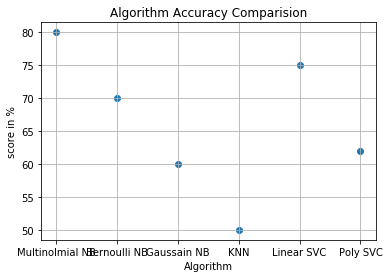

In [278]:
plt.scatter(x=a,y=b)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('score in %')
plt.show()

In [279]:
import seaborn as sns

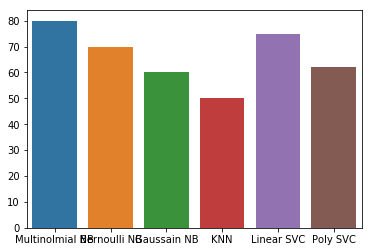

In [280]:
sns.barplot(x=a,y=b)

In [281]:
c=["GaussianSVC","DecisionTree","RandomForest","VotingClassifier","Bagging","GradientBoosting"]

In [282]:
d=[60,60,70,75,40,50]

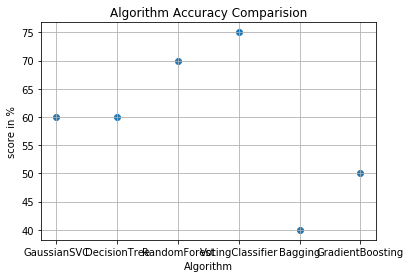

In [283]:
plt.scatter(x=c,y=d)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('score in %')
plt.show()

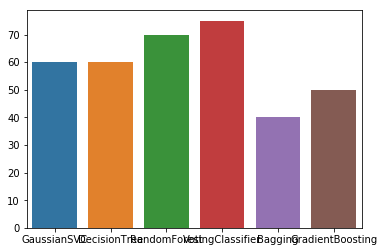

In [284]:
sns.barplot(x=c,y=d)

# Accuracy reports of classifiers:


### Multinolmial Naive Bayes - 0.786667
### Bernoulli Naive Bayes - 0.766667
### Linear SVC - 0.743333
### Random Forest Classifier - 0.7166673
### BaggingClassifier - 0.693333
### Voting Classifier- 0.670000
### Gaussain Naive Bayes - 0.666667
### Decision Tree Classifier - 0.666667
### GradientBoostingClassifier - 0.660000
### KNN - 0.600000
### Poly SVC - 0.493333
### Gaussian SVC - 0.493333



# According to accuracy reports of classifiers the best one is Multinolmial Naive Bayes - 0.786667

# According to metrics score the best classifier is Multinolmial Naive Bayes	0.785723